# Honey Production in the USA from 1998 - 2012

In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sn
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

In [2]:
#importing dataset
df = pd.read_csv('honeyproduction.csv')
df.head(10)

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998
5,FL,230000.0,98,22540000.0,4508000.0,0.64,14426000.0,1998
6,GA,75000.0,56,4200000.0,307000.0,0.69,2898000.0,1998
7,HI,8000.0,118,944000.0,66000.0,0.77,727000.0,1998
8,ID,120000.0,50,6000000.0,2220000.0,0.65,3900000.0,1998
9,IL,9000.0,71,639000.0,204000.0,1.19,760000.0,1998


# Preprocessing Data

In [3]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state        626 non-null    object 
 1   numcol       626 non-null    float64
 2   yieldpercol  626 non-null    int64  
 3   totalprod    626 non-null    float64
 4   stocks       626 non-null    float64
 5   priceperlb   626 non-null    float64
 6   prodvalue    626 non-null    float64
 7   year         626 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 39.2+ KB


In [4]:
print(df.isnull().sum())
print(df.columns)
print(df.dtypes)

state          0
numcol         0
yieldpercol    0
totalprod      0
stocks         0
priceperlb     0
prodvalue      0
year           0
dtype: int64
Index(['state', 'numcol', 'yieldpercol', 'totalprod', 'stocks', 'priceperlb',
       'prodvalue', 'year'],
      dtype='object')
state           object
numcol         float64
yieldpercol      int64
totalprod      float64
stocks         float64
priceperlb     float64
prodvalue      float64
year             int64
dtype: object


In [5]:
df.describe()

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
count,626.000000,626.000000,6.260000e+02,6.260000e+02,626.000000,6.260000e+02,626.000000
mean,60284.345048,62.009585,4.169086e+06,1.318859e+06,1.409569,4.715741e+06,2004.864217
std,91077.087231,19.458754,6.883847e+06,2.272964e+06,0.638599,7.976110e+06,4.317306
min,2000.000000,19.000000,8.400000e+04,8.000000e+03,0.490000,1.620000e+05,1998.000000
25%,9000.000000,48.000000,4.750000e+05,1.430000e+05,0.932500,7.592500e+05,2001.000000
50%,26000.000000,60.000000,1.533000e+06,4.395000e+05,1.360000,1.841500e+06,2005.000000
75%,63750.000000,74.000000,4.175250e+06,1.489500e+06,1.680000,4.703250e+06,2009.000000
max,510000.000000,136.000000,4.641000e+07,1.380000e+07,4.150000,6.961500e+07,2012.000000


In [6]:
df.shape

(626, 8)

In [7]:
df.columns

Index(['state', 'numcol', 'yieldpercol', 'totalprod', 'stocks', 'priceperlb',
       'prodvalue', 'year'],
      dtype='object')

In [8]:
dfc=df[['state', 'numcol', 'yieldpercol', 'totalprod', 'stocks', 'priceperlb',
       'prodvalue']]

# Exploratory Analysis

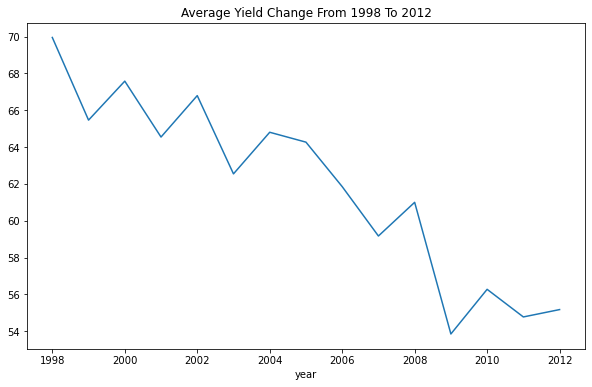

In [9]:
df.groupby('year').yieldpercol.mean().plot(figsize=(10,6), title='Average Yield Change From 1998 To 2012');

In [10]:
# creating a summary table grouped by year to analyze the trend

by_year = df[['totalprod','year','yieldpercol','stocks','prodvalue']].groupby('year').sum()
by_year.head()

,totalprod,yieldpercol,stocks,prodvalue
year,,,,
1998,219519000.0,3008,80565000.0,146091000.0
1999,202387000.0,2815,78390000.0,123657000.0
2000,219558000.0,2906,84956000.0,131568000.0
2001,185748000.0,2840,64764000.0,132282000.0
2002,171265000.0,2939,39177000.0,227302000.0


In [11]:
by_year.reset_index(level=0,inplace=True)
by_year.head()

,year,totalprod,yieldpercol,stocks,prodvalue
0,1998,219519000.0,3008,80565000.0,146091000.0
1,1999,202387000.0,2815,78390000.0,123657000.0
2,2000,219558000.0,2906,84956000.0,131568000.0
3,2001,185748000.0,2840,64764000.0,132282000.0
4,2002,171265000.0,2939,39177000.0,227302000.0


In [12]:
# finding out maximum production values by state
state_max = df[['state','totalprod']].groupby('state').max()
state_max.reset_index(level=0,inplace=True)
state_max.columns = ['State','Max Prod']
state_max.head()

,State,Max Prod
0,AL,1248000.0
1,AR,4900000.0
2,AZ,3300000.0
3,CA,37350000.0
4,CO,2700000.0


In [13]:
# finding out minimum production values by state
state_min = df[['state','totalprod']].groupby('state').min()
state_min.reset_index(level=0,inplace=True)
state_min.columns = ['State','Min Prod']
state_min.head()

,State,Min Prod
0,AL,432000.0
1,AR,1368000.0
2,AZ,1012000.0
3,CA,11550000.0
4,CO,1200000.0


In [14]:
#Top 5 states with highest decline in honey production
# merging maximum and minimum dataframe to find the range
state_range = pd.merge(state_max,state_min,how='inner',on='State')
state_range.head()

,State,Max Prod,Min Prod
0,AL,1248000.0,432000.0
1,AR,4900000.0,1368000.0
2,AZ,3300000.0,1012000.0
3,CA,37350000.0,11550000.0
4,CO,2700000.0,1200000.0


In [15]:
state_range['Change Percentage'] = ((state_range['Max Prod']-state_range['Min Prod'])/state_range['Max Prod'])*100
state_range.sort_values(by='Change Percentage',ascending=False,inplace=True)
state_range.head()

# MO, NM and ME are the top three state with highest decline in honey production

,State,Max Prod,Min Prod,Change Percentage
19,MO,1725000.0,344000.0,80.057971
26,NM,960000.0,246000.0,74.375000
16,ME,451000.0,120000.0,73.392461
15,MD,308000.0,84000.0,72.727273
12,KS,1120000.0,308000.0,72.500000


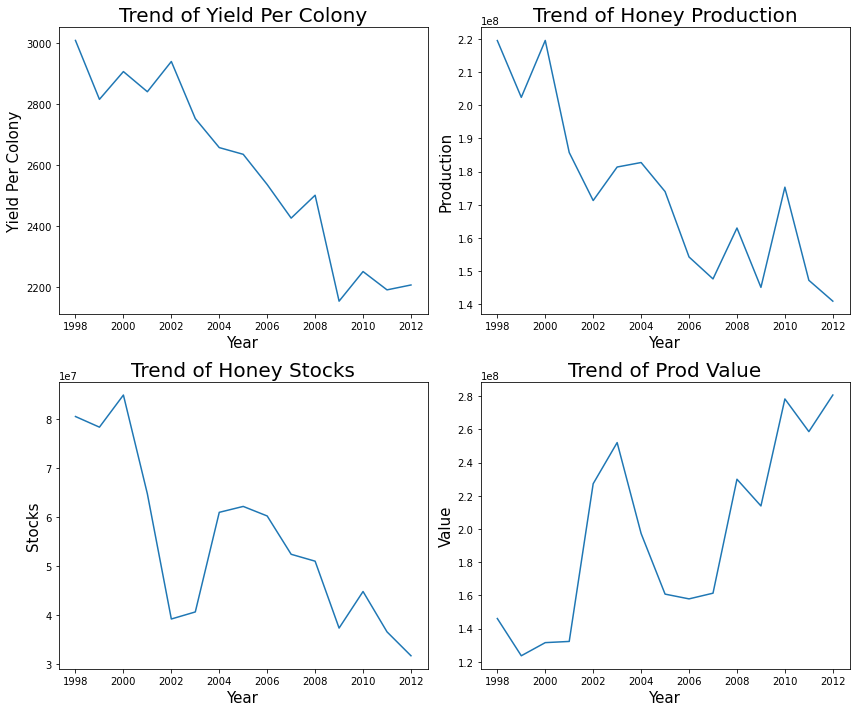

In [16]:
#creating subplots for each of the trend analysis
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(12,10))

ax1.plot(by_year['year'],by_year['yieldpercol'])
ax1.set_title('Trend of Yield Per Colony',fontsize=20)
ax1.set_xlabel('Year',fontsize=15)
ax1.set_ylabel('Yield Per Colony',fontsize=15)

ax2.plot(by_year['year'],by_year['totalprod'])
ax2.set_title('Trend of Honey Production',fontsize=20)
ax2.set_xlabel('Year',fontsize=15)
ax2.set_ylabel('Production',fontsize=15)

ax3.plot(by_year['year'],by_year['stocks'])
ax3.set_title('Trend of Honey Stocks',fontsize=20)
ax3.set_xlabel('Year',fontsize=15)
ax3.set_ylabel('Stocks',fontsize=15)

ax4.plot(by_year['year'],by_year['prodvalue'])
ax4.set_title('Trend of Prod Value',fontsize=20)
ax4.set_xlabel('Year',fontsize=15)
ax4.set_ylabel('Value',fontsize=15)

plt.tight_layout()
plt.show()

# Yield per colony is showing a consistent decline trend from 2002 to 2007, there is an increase in 2008 followed by a decline in subsequent years.
# Honey production trend is also following a similar pattern due to its correlation with Yield.
# Production value is shown an upward trend, evidently the price is going up, data needs to be adjusted for inflation to check the actual trend.

In [17]:
#Correlation between variables
corr_mat = dfc.corr()
print(corr_mat)

               numcol  yieldpercol  totalprod    stocks  priceperlb  prodvalue
numcol       1.000000     0.243515   0.953594  0.825929   -0.232701   0.912796
yieldpercol  0.243515     1.000000   0.396252  0.367812   -0.358646   0.278977
totalprod    0.953594     0.396252   1.000000  0.878830   -0.264499   0.907236
stocks       0.825929     0.367812   0.878830  1.000000   -0.305867   0.728560
priceperlb  -0.232701    -0.358646  -0.264499 -0.305867    1.000000  -0.089567
prodvalue    0.912796     0.278977   0.907236  0.728560   -0.089567   1.000000


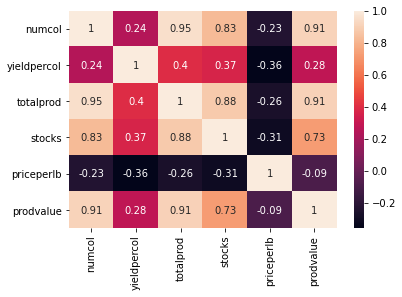

In [18]:
#visualizing correlation matrix
sn.heatmap(corr_mat, annot=True)
plt.show()

In [51]:
df.columns

Index(['state', 'numcol', 'yieldpercol', 'totalprod', 'stocks', 'priceperlb',
       'prodvalue', 'year'],
      dtype='object')

In [52]:
X =df[['state','numcol', 'yieldpercol', 'stocks', 'priceperlb','prodvalue', ]]
y = df['totalprod']

In [53]:
cat_cols = X.columns[X.dtypes == 'O']
num_cols = X.columns[X.dtypes =='float64']

categories = [
    X[column].unique() for column in X[cat_cols]]

for cat in categories:
    cat[cat == None] = 'missing'  # noqa

cat_proc_nlin = make_pipeline(
    SimpleImputer(missing_values=None, strategy='constant',
                  fill_value='missing'),
    OrdinalEncoder(categories=categories)
    )

num_proc_nlin = make_pipeline(SimpleImputer(strategy='mean'))

cat_proc_lin = make_pipeline(
    SimpleImputer(missing_values=None,
                  strategy='constant',
                  fill_value='missing'),
    OneHotEncoder(categories=categories)
)

num_proc_lin = make_pipeline(
    SimpleImputer(strategy='mean'),
    StandardScaler()
)

# transformation to use for non-linear estimators
processor_nlin = make_column_transformer(
    (cat_proc_nlin, cat_cols),
    (num_proc_nlin, num_cols),
    remainder='passthrough')

# transformation to use for linear estimators
processor_lin = make_column_transformer(
    (cat_proc_lin, cat_cols),
    (num_proc_lin, num_cols),
    remainder='passthrough')

In [54]:

decision_pipeline = make_pipeline(processor_lin,
                               DecisionTreeRegressor())

rf_pipeline = make_pipeline(processor_nlin,
                            RandomForestRegressor(random_state=42))

Linear_pipeline = make_pipeline(
    processor_nlin,
    LinearRegression())
xgboost_pipeline = make_pipeline(
    processor_nlin,
    xgb.XGBRegressor(objective ='reg:linear'))

estimators = [('Random Forest', rf_pipeline),
              ('Decision tree', decision_pipeline),
              ('Linear Regression', Linear_pipeline),
              ('Xgboost Regression', xgboost_pipeline)]
stacking_regressor = StackingRegressor(estimators=estimators,
                                       final_estimator=RidgeCV())

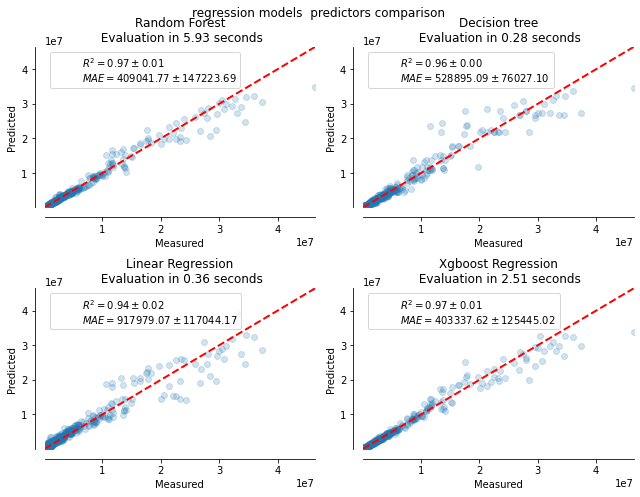

In [55]:
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate, cross_val_predict


def plot_regression_results(ax, y_true, y_pred, title, scores, elapsed_time):
    """Scatter plot of the predicted vs true targets."""
    ax.plot([y_true.min(), y_true.max()],
            [y_true.min(), y_true.max()],
            '--r', linewidth=2)
    ax.scatter(y_true, y_pred, alpha=0.2)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    ax.set_xlim([y_true.min(), y_true.max()])
    ax.set_ylim([y_true.min(), y_true.max()])
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')
    extra = plt.Rectangle((0, 0), 0, 0, fc="w", fill=False,
                          edgecolor='none', linewidth=0)
    ax.legend([extra], [scores], loc='upper left')
    title = title + '\n Evaluation in {:.2f} seconds'.format(elapsed_time)
    ax.set_title(title)


fig, axs = plt.subplots(2, 2, figsize=(9, 7))
axs = np.ravel(axs)

for ax, (name, est) in zip(axs, estimators + [('Stacking Regressor',
                                               stacking_regressor)]):
    start_time = time.time()
    score = cross_validate(est, X, y,
                           scoring=['r2', 'neg_mean_absolute_error'],
                           n_jobs=-1, verbose=0)
    elapsed_time = time.time() - start_time

    y_pred = cross_val_predict(est, X, y, n_jobs=-1, verbose=0)

    plot_regression_results(
        ax, y, y_pred,
        name,
        (r'$R^2={:.2f} \pm {:.2f}$' + '\n' + r'$MAE={:.2f} \pm {:.2f}$')
        .format(np.mean(score['test_r2']),
                np.std(score['test_r2']),
                -np.mean(score['test_neg_mean_absolute_error']),
                np.std(score['test_neg_mean_absolute_error'])),
        elapsed_time)

plt.suptitle('regression models  predictors comparison ')
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

# Splitting dataset for training and testing

In [24]:
df.columns

Index(['state', 'numcol', 'yieldpercol', 'totalprod', 'stocks', 'priceperlb',
       'prodvalue', 'year'],
      dtype='object')

In [25]:
encoded=df[['state']].apply(LabelEncoder().fit_transform)

In [26]:
num=df[['numcol', 'yieldpercol', 'totalprod', 'stocks', 'priceperlb',
       'prodvalue', 'year']]

In [27]:
data=pd.concat([encoded,num],axis=1)

In [28]:
X =data[['state','numcol', 'yieldpercol', 'stocks', 'priceperlb','prodvalue', ]]
y = data['totalprod']

In [29]:
X = X.values
y = y.values

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
print(X_train.shape,X_test.shape)

(500, 6) (126, 6)


# Preprocessing Data

In [30]:
#Standardizing X_train and y_train
#Splitdata

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Linear Regression Model 

In [31]:
m1 = LinearRegression()
model1=m1.fit(X_train, y_train)
y_pred = model1.predict(X_test)
print(y_pred)

[ 3.18858010e+06  1.54289928e+06  1.04504957e+07  5.40401287e+06
  1.48337696e+07  4.23719338e+05 -6.02966116e+05  5.42438038e+05
  8.81328535e+06 -8.57762578e+05  2.53063437e+05  5.41167138e+05
 -2.36922892e+05  2.67531562e+07  3.55868478e+06  3.68864564e+04
  1.11744899e+07  2.69684290e+07  7.11560764e+05  4.55552076e+06
  2.11717192e+07  6.82961019e+06  9.60227742e+05  1.27723983e+06
  7.40934231e+04  8.19886343e+05 -1.26619208e+06  5.41574202e+06
  4.57137585e+05  5.20809963e+06 -1.81390005e+05  5.91718114e+05
  2.50646661e+06  1.99273609e+06  1.57854970e+06 -8.42687086e+05
  1.30152100e+06  5.08371438e+06  4.81842687e+06  8.03117187e+05
 -1.75086166e+05  3.62728048e+05 -7.02084994e+05  1.12849510e+07
 -3.72602310e+05  4.27774211e+03  2.16888354e+06  3.41735954e+06
  2.68990669e+07  7.38437853e+05 -7.95353432e+05  1.15429877e+06
 -4.46070800e+05  2.99613761e+06  2.34246748e+06  3.86773969e+06
  1.26419026e+06 -4.64278245e+05  3.92488684e+06  8.86203634e+06
  3.39070869e+06  3.65422

In [32]:
print('MSE =', mse( y_test,y_pred))
print('MAE =', mae(y_test,y_pred))
print('R2 Score =', r2_score(y_test,y_pred))

MSE = 3585002075602.999
MAE = 1036695.8454102526
R2 Score = 0.9451418997692103


# Decision Tree regression

In [33]:
m2 = DecisionTreeRegressor()

model2=m2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
print(y_pred2)

[ 2891000.   720000. 13770000.  3330000. 22575000.   472000.   252000.
   901000. 11060000.   374000.   539000.   455000.   141000. 27470000.
  4180000.   324000. 11360000. 26775000.  1104000.  3591000. 22540000.
  5544000.   868000.  1170000.   408000.  1080000.   296000.  4600000.
   320000.  4539000.   343000.   567000.  2537000.  1314000.  1116000.
   136000.  1760000.  4480000.  3960000.   639000.   484000.   656000.
   252000. 20460000.   276000.   408000.  2530000.  2925000. 26880000.
  1344000.   288000.  1170000.   360000.  2795000.  1372000.  3712000.
   871000.   294000.  2345000.  8375000.   944000.  3430000.   488000.
  8541000.  2700000.  4524000.   220000.  3712000. 13800000.  6300000.
  7930000.  4539000. 10125000.  1978000.   988000.  1116000.   336000.
  1870000. 30000000. 10220000.  1550000.  9380000.  1404000.  1500000.
   944000.  3315000.   138000.  4355000. 36000000.  2600000.  5427000.
   253000.   750000.  5544000.  4551000.   200000.   912000. 27470000.
   871

In [34]:
print('MSE =', mse( y_test,y_pred2))
print('MAE =', mae(y_test,y_pred2))
print('R2 Score =', r2_score(y_test,y_pred2))

MSE = 3940690833333.3335
MAE = 717373.0158730159
R2 Score = 0.9396991108639197


# Random Forest Regression

In [35]:
from sklearn.ensemble import RandomForestRegressor 
m3 = RandomForestRegressor()

model3=m3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)
print(y_pred3)

[ 3031210.   729580. 11474450.  3627110. 20546400.   448370.   241390.
   953790. 10318210.   305660.   599120.   432360.   186560. 26946950.
  3895930.   348010. 11942450. 27431880.  1108020.  3880020. 23742550.
  5598240.   876750.  1244640.   430080.  1115180.   264330.  4679490.
   342540.  4413630.   333580.   552050.  2701630.  1429240.  1385060.
   206070.  1497670.  4703870.  4181370.   593280.   477420.   717400.
   265510. 13139610.   268360.   390100.  2642780.  3202320. 26834200.
  1194010.   312000.  1136890.   372510.  2528480.  1359410.  3217850.
   993420.   296120.  2906870.  8914340.   844450.  3480460.   483290.
  8323080.  3004450.  4211840.   272850.  3595640. 14118600.  6002130.
  8577910.  3922660. 10725430.  2107010.   979380.  1290810.   358030.
  2115490. 30096950. 12677920.  1892630.  9460340.  1586960.  1390260.
   805950.  2964130.   206650.  4567610. 35348500.  2608430.  5975290.
   320110.   710310.  5747300.  4046150.   226010.   920270. 24419180.
   766

In [36]:
print('MSE =', mse( y_test,y_pred3))
print('MAE =', mae(y_test,y_pred3))
print('R2 Score =', r2_score(y_test,y_pred3))

MSE = 2688550613319.048
MAE = 513537.77777777775
R2 Score = 0.9588594996848921


In [37]:
from sklearn.model_selection import GridSearchCV# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}# Create a based model
rf = RandomForestRegressor()# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_


def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(base_model,X_train, y_train)


Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   52.3s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  5.0min finished


Model Performance
Average Error: 140555.4000 degrees.
Accuracy = 96.24%.


# XgBoost regressor

In [39]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear')

In [40]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

[12:03:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


In [41]:
print('MSE =', mse( y_test,preds))
print('MAE =', mae(y_test,preds))
print('R2 Score =', r2_score(y_test,preds))

MSE = 2051347984982.3206
MAE = 504684.39459325396
R2 Score = 0.9686100451282276


In [44]:
from sklearn.model_selection import GridSearchCV# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}# Create a based model
xg = xgb.XGBRegressor(objective ='reg:linear')# Instantiate the grid search model
grid_search = GridSearchCV(estimator = xg, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_


def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

base_model = xgb.XGBRegressor(objective ='reg:linear')
base_model.fit(X_train, y_train)
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(base_model,X_train, y_train)


Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   28.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed: 14.0min finished


[12:36:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[12:36:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { bootstrap, max_features, min_samples_leaf, min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:36:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
Model Performance
Average Error: 2140.2706 degrees.
Accuracy = 99.75%.
